In [3]:
import pandas as pd

df = pd.read_csv(r"C:\Users\HP\Downloads\DL Practicale by samu\BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [13]:
x = df.loc[:,df.columns!='medv']
y = df.loc[:,df.columns=='medv']

'''   X = df.drop(columns=['MEDV'])
y = df['MEDV']   '''

"   X = df.drop(columns=['MEDV'])\ny = df['MEDV']   "

In [15]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [11]:
y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [19]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train = mms.fit_transform(x_train)
x_test = mms.transform(x_test)

In [21]:
x_train


array([[0.00847897, 0.        , 0.28152493, ..., 0.89361702, 1.        ,
        0.18018764],
       [0.00224935, 0.25      , 0.17118768, ..., 0.75531915, 0.95254425,
        0.35071744],
       [0.13351647, 0.        , 0.64662757, ..., 0.80851064, 1.        ,
        0.53835541],
       ...,
       [0.0797757 , 0.        , 0.64662757, ..., 0.80851064, 1.        ,
        0.48675497],
       [0.00440827, 0.        , 0.21041056, ..., 0.5106383 , 0.94919058,
        0.25248344],
       [0.00100397, 0.        , 0.2016129 , ..., 0.70212766, 1.        ,
        0.19426049]])

from sklearn.preprocessing import StandardScaler
# Feature scaling
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
# Normalize target variable (manual scaling to maintain interpretability)
y_train_mean = y_train.mean()
y_train_std = y_train.std()
y_train = (y_train - y_train_mean) / y_train_std
y_test = (y_test - y_train_mean) / y_train_std  # Normalize test data based on training mean/std

In [31]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Build the model (simplified architecture)
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# Compile the model
optimizer = Adam(learning_rate=0.01)  # Increased learning rate for faster convergence
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [37]:
# Early stopping
early_stopping = EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss')

In [41]:
# Train the model
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 366.9979 - mae: 16.2051 - val_loss: 61.5471 - val_mae: 5.3229
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 53.5544 - mae: 5.3172 - val_loss: 67.5721 - val_mae: 6.7610
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 64.8270 - mae: 5.8853 - val_loss: 43.2618 - val_mae: 4.1857
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 36.3668 - mae: 4.2846 - val_loss: 26.5747 - val_mae: 3.2172
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 28.0959 - mae: 3.6055 - val_loss: 22.0405 - val_mae: 2.9914
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.4955 - mae: 3.1236 - val_loss: 23.1958 - val_mae: 3.1497
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 24.3139 - mae: 3.3416 - val_loss: 31.6260 - val_mae: 3.9350
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 29.7874 - mae: 3.9190 - val_loss: 25.8835 - val_mae: 3.3412
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━

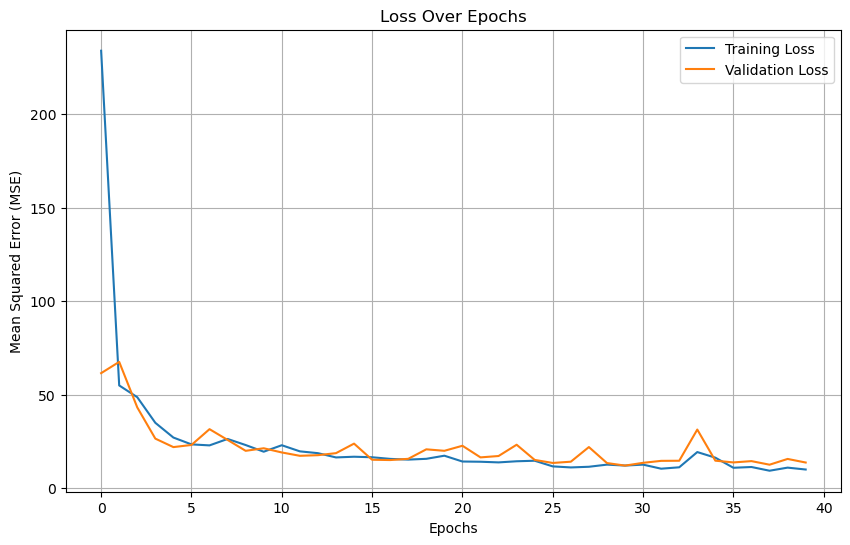

In [43]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid()
plt.show()

In [45]:
mse,mae = model.evaluate(x_test,y_test)
print('MSE : ',mse)
print('MAE : ',mae)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.9920 - mae: 2.3804
MSE :  9.019230842590332
MAE :  2.3402817249298096


In [47]:
y1 = model.predict(x_test[:])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [49]:
y1


array([[28.76862  ],
       [24.074345 ],
       [19.540403 ],
       [22.186977 ],
       [24.944004 ],
       [19.089983 ],
       [32.048435 ],
       [18.246025 ],
       [21.726799 ],
       [25.65855  ],
       [29.546597 ],
       [27.812199 ],
       [19.266083 ],
       [22.357784 ],
       [21.053436 ],
       [24.4416   ],
       [13.842555 ],
       [48.960125 ],
       [26.170446 ],
       [16.7748   ],
       [19.970963 ],
       [15.743331 ],
       [23.212511 ],
       [24.7496   ],
       [30.352455 ],
       [10.521387 ],
       [14.32076  ],
       [19.698757 ],
       [40.07669  ],
       [14.367788 ],
       [21.76188  ],
       [16.614166 ],
       [52.996128 ],
       [16.309496 ],
       [21.63646  ],
       [20.382694 ],
       [15.660056 ],
       [30.906815 ],
       [11.7665205],
       [19.91237  ],
       [24.279655 ],
       [23.562843 ],
       [26.898094 ],
       [14.912759 ],
       [17.46634  ],
       [11.493052 ],
       [52.34298  ],
       [16.55

In [51]:
ps=[]
for i in y1:
    ps.append(list(i)[0])

In [53]:
d = pd.DataFrame({'actual':y_test['medv'],'predicted':ps})

In [55]:
d

,actual,predicted
307,28.2,28.768620
343,23.9,24.074345
47,16.6,19.540403
67,22.0,22.186977
362,20.8,24.944004
...,...,...
467,19.1,16.261585
95,28.4,27.450163
122,20.5,20.459232
260,33.8,34.721848


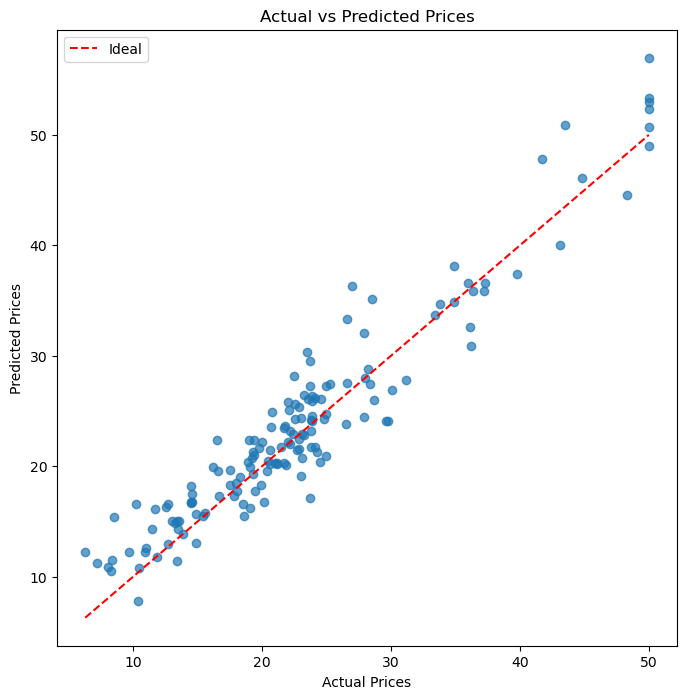

In [59]:
# Scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(y_test, ps, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()